In [1]:
import os
import shutil
import numpy as np
import pandas as pd   
from sklearn.model_selection import train_test_split   

In [2]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
  inflating: __MACOSX/._Data         
   creating: Data/hypodontia/
  inflating: __MACOSX/Data/._hypodontia  
  inflating: Data/.DS_Store          
  inflating: __MACOSX/Data/._.DS_Store  
   creating: Data/Tooth Discoloration/
  inflating: __MACOSX/Data/._Tooth Discoloration  
   creating: Data/Ulcer/
  inflating: __MACOSX/Data/._Ulcer   
   creating: Data/Gingivitis/
  inflating: __MACOSX/Data/._Gingivitis  
   creating: Data/Caries/
  inflating: __MACOSX/Data/._Caries  
   creating: Data/Calculus/
  inflating: __MACOSX/Data/._Calculus  
  inflating: Data/hypodontia/(819).jpg  
  inflating: __MACOSX/Data/hypodontia/._(819).jpg  
  inflating: Data/hypodontia/(1007).JPG  
  inflating: __MACOSX/Data/hypodontia/._(1007).JPG  
  inflating: Data/hypodontia/(24).JPG  
  inflating: __MACOSX/Data/hypodontia/._(24).JPG  
  inflating: Data/hypodontia/(1142).JPG  
  inflating: __MACOSX/Data/hypodontia/._(1142).JPG  
  inflating: Data/hypodontia/(726).JPG  
 

# Data PreProcessing

In [3]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Define paths
data_dir = 'Data'
train_dir = 'Train'
val_dir = 'Val'
test_dir = 'Test'

# Create directories for the split data
for directory in [train_dir, val_dir, test_dir]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Function to split data
def split_data(class_dir, train_dir, val_dir, test_dir, test_size=0.20):
    # Get filenames
    files = os.listdir(class_dir)
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)
    test_files, val_files = train_test_split(test_files, test_size=0.50, random_state=42)

    # Copy files to train, val, and test directories
    for file in train_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(train_dir, file))
    for file in val_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(val_dir, file))
    for file in test_files:
        shutil.copy(os.path.join(class_dir, file), os.path.join(test_dir, file))

# Iterate over each class and split the data
classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Ulcer', 'Tooth Discoloration']
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)

    # Create class directories in train, val, and test
    for directory in [train_dir, val_dir, test_dir]:
        class_directory = os.path.join(directory, class_name)
        if not os.path.exists(class_directory):
            os.makedirs(class_directory)

    # Split and copy files
    split_data(class_dir, os.path.join(train_dir, class_name), os.path.join(val_dir, class_name), os.path.join(test_dir, class_name))

print("Data split into train, validation, and test sets.")

Data split into train, validation, and test sets.


## Data Distribution

In [4]:
# Directory paths
train_dir = 'Train'
val_dir = 'Val'
test_dir = 'Test'

# Classes
classes = ['Calculus', 'Caries', 'Gingivitis', 'hypodontia', 'Ulcer', 'Tooth Discoloration']

# Function to calculate size of each class
def calculate_class_sizes(dir_path, classes):
    return {class_name: len(os.listdir(os.path.join(dir_path, class_name))) for class_name in classes}

# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 4448 images
 - Calculus: 1036 images (23.29% of train set)
 - Caries: 175 images (3.93% of train set)
 - Gingivitis: 1879 images (42.24% of train set)
 - hypodontia: 1000 images (22.48% of train set)
 - Ulcer: 212 images (4.77% of train set)
 - Tooth Discoloration: 146 images (3.28% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


/var/folders/hn/5fpc0nwn3l5dqrb9wq8zr_w80000gn/T/ipykernel_20768/2005837930.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(class_names, rotation=45, ha='right')


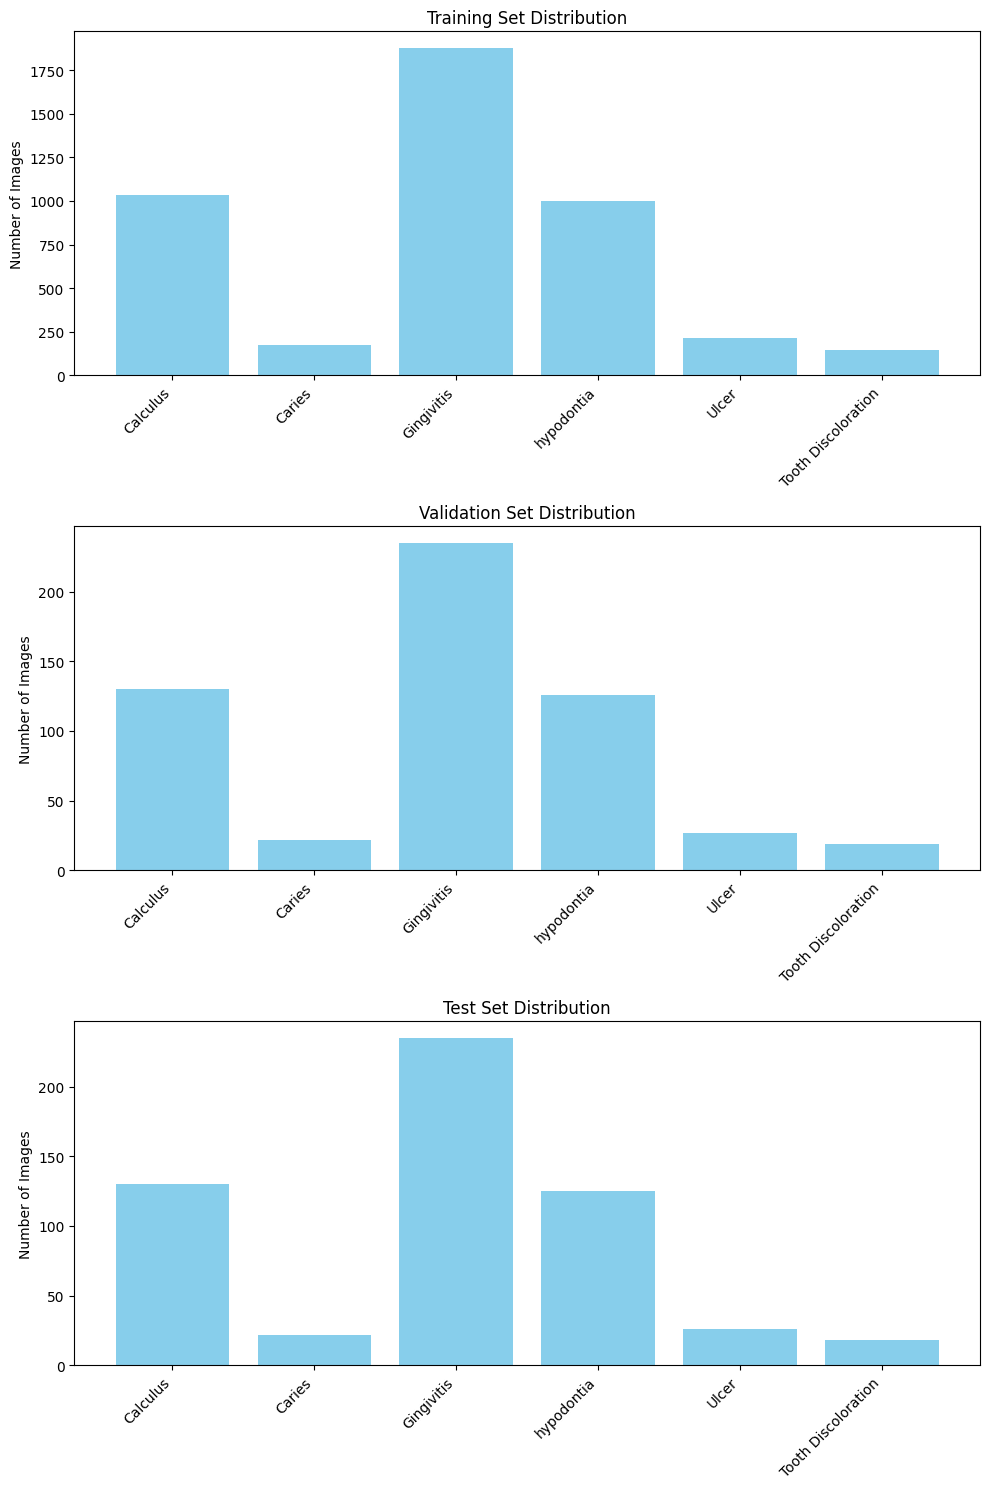

In [5]:
import matplotlib.pyplot as plt

# Assuming the sizes are already calculated as in your previous code
# train_sizes, val_sizes, test_sizes

# Data for plotting
class_names = list(train_sizes.keys())
train_counts = list(train_sizes.values())
val_counts = list(val_sizes.values())
test_counts = list(test_sizes.values())

# Function to create a bar plot
def create_bar_plot(ax, counts, title):
    ax.bar(class_names, counts, color='skyblue')
    ax.set_title(title)
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    ax.set_ylabel('Number of Images')

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot data
create_bar_plot(axes[0], train_counts, 'Training Set Distribution')
create_bar_plot(axes[1], val_counts, 'Validation Set Distribution')
create_bar_plot(axes[2], test_counts, 'Test Set Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [65]:
#pip install keras

In [66]:
#pip install tensorflow

## OverSampling (Class Imbalance Correction)

In [6]:
import random
import tensorflow as tf        
import keras 
from keras.preprocessing.image import ImageDataGenerator 

train_dir = 'Train'

# Function to perform oversampling
def oversample_class(class_dir, target_count):
    files = os.listdir(class_dir)
    while len(files) < target_count:
        chosen_file = random.choice(files)
        new_file = f'oversampled_{random.randint(1, 10000)}_{chosen_file}'
        shutil.copy(os.path.join(class_dir, chosen_file), os.path.join(class_dir, new_file))
        files.append(new_file)

target_counts = {
    'Caries': 1000,
    'Ulcer': 1000,
    'Tooth Discoloration': 1000
}

for class_name, target_count in target_counts.items():
    class_dir = os.path.join(train_dir, class_name)
    oversample_class(class_dir, target_count)


In [7]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 6914 images
 - Calculus: 1036 images (14.98% of train set)
 - Caries: 999 images (14.45% of train set)
 - Gingivitis: 1879 images (27.18% of train set)
 - hypodontia: 1000 images (14.46% of train set)
 - Ulcer: 1000 images (14.46% of train set)
 - Tooth Discoloration: 1000 images (14.46% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


In [8]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 6914 images
 - Calculus: 1036 images (14.98% of train set)
 - Caries: 999 images (14.45% of train set)
 - Gingivitis: 1879 images (27.18% of train set)
 - hypodontia: 1000 images (14.46% of train set)
 - Ulcer: 1000 images (14.46% of train set)
 - Tooth Discoloration: 1000 images (14.46% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


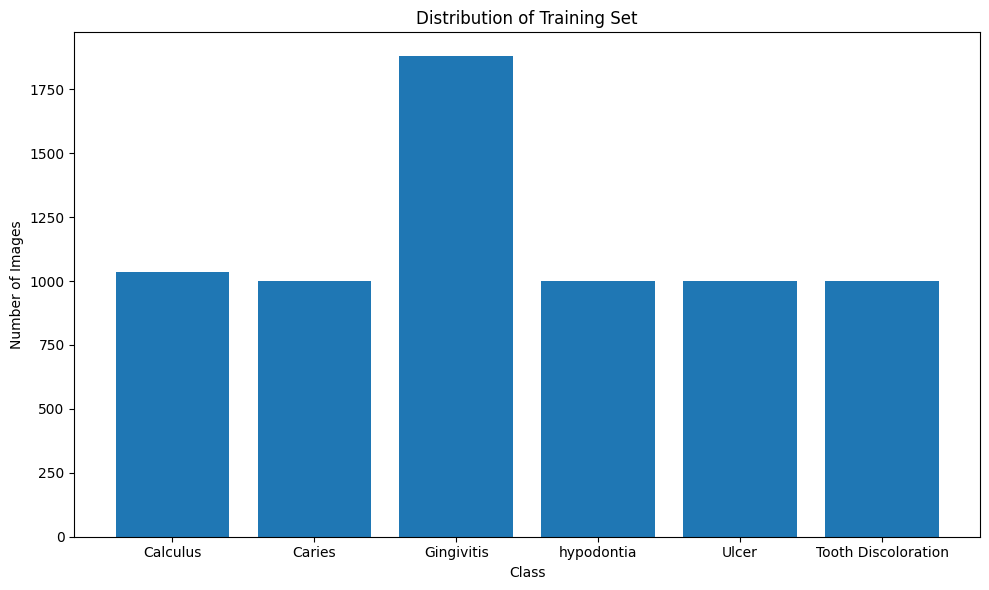

In [9]:
train_counts = list(train_sizes.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, train_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Set')
plt.tight_layout()
plt.show()

## Data Visualization

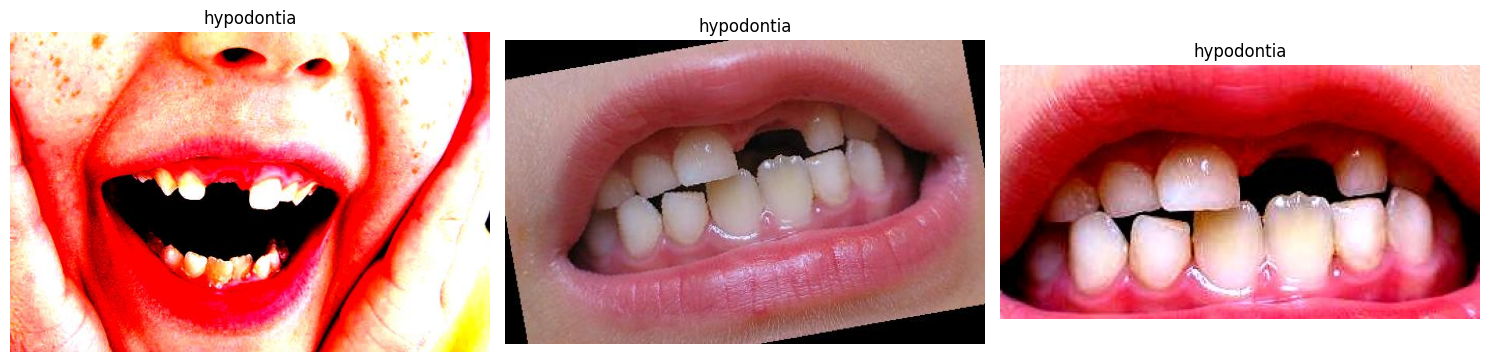

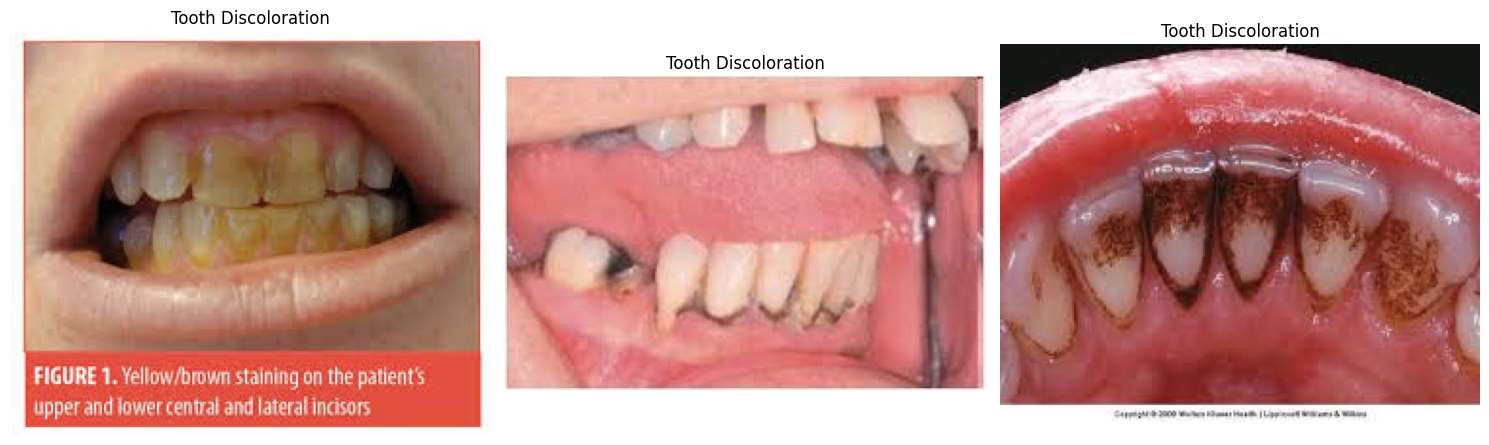

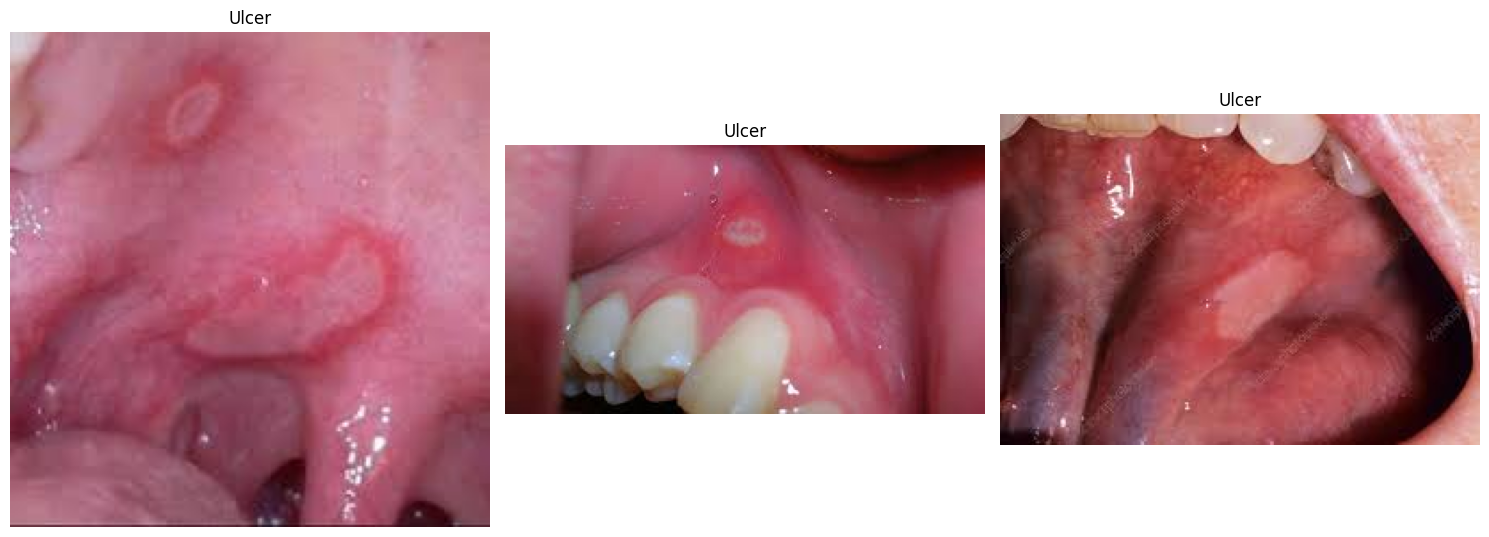

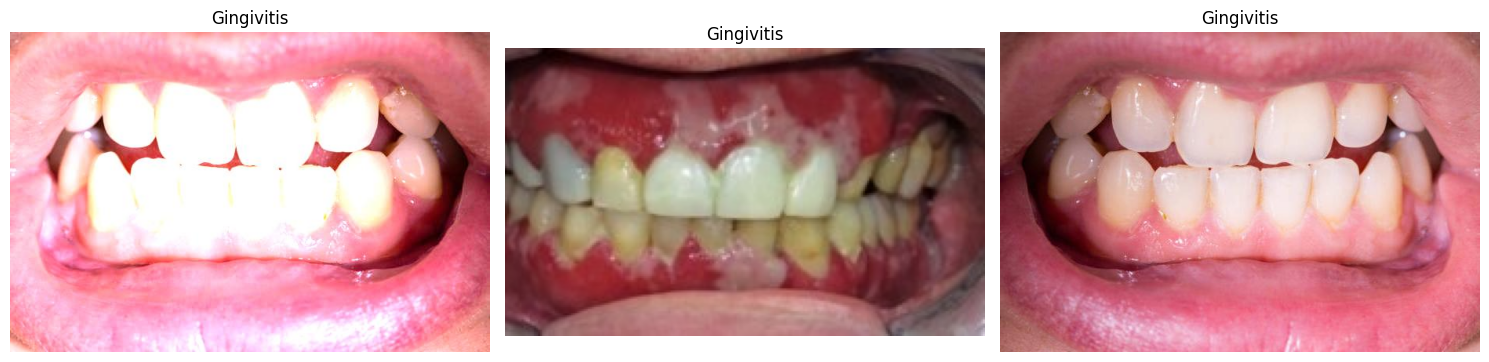

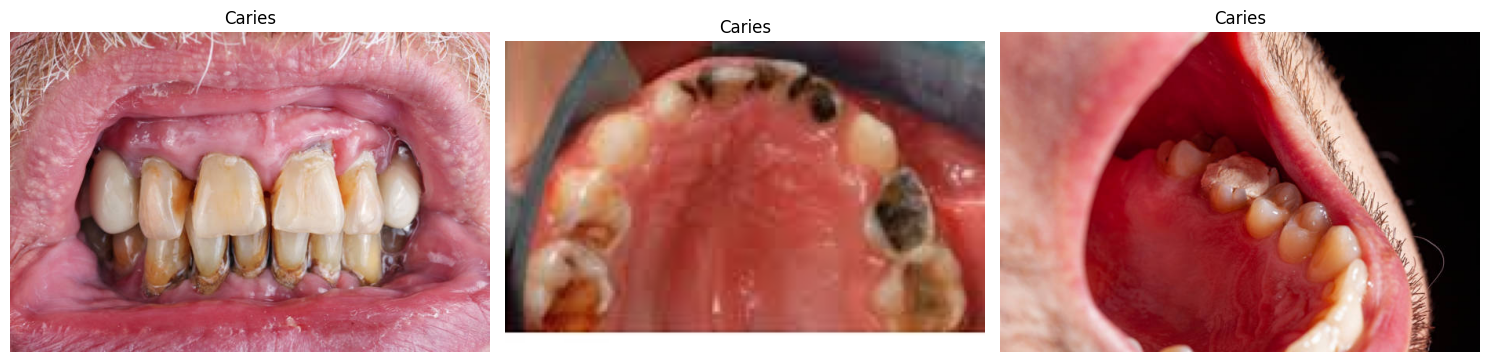

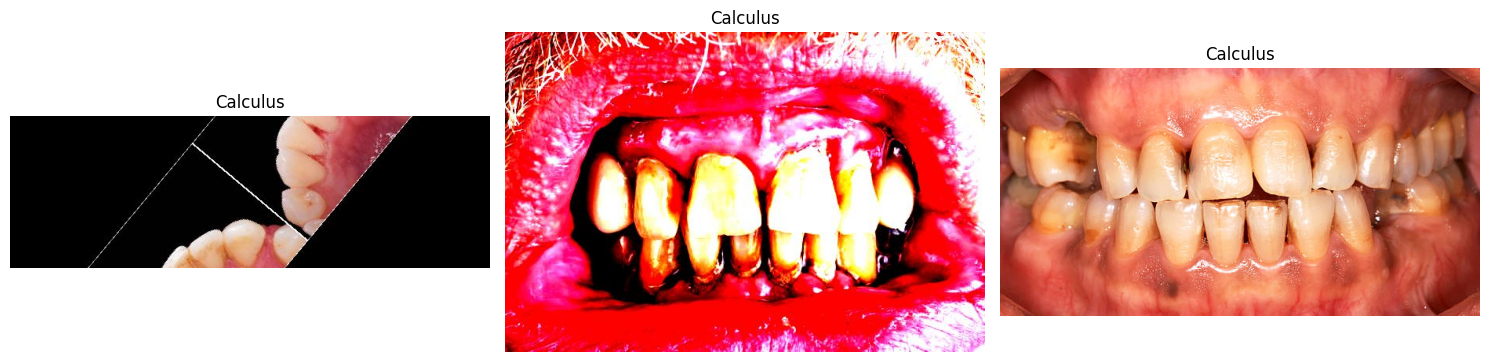

In [10]:
from PIL import Image

def display_images(image_paths, cols=3, rows=2, figsize=(15, 10)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    for img_path, ax in zip(image_paths, axes):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(os.path.basename(os.path.dirname(img_path)))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

data_dir = 'Train'
num_images_to_display = 3  # Number of images to display for each class

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        image_files = os.listdir(class_dir)
        selected_images = random.sample(image_files, min(len(image_files), num_images_to_display))
        selected_image_paths = [os.path.join(class_dir, img) for img in selected_images]
        display_images(selected_image_paths, cols=num_images_to_display, rows=1)

# Baseline Model (RF and LR)

In [11]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from PIL import Image

def load_images(train_dir_, size=(64, 64)):
    images = []
    labels = []
    class_names = os.listdir(train_dir_)

    for class_name in class_names:
        class_dir = os.path.join(train_dir_, class_name)
        if not os.path.isdir(class_dir):
            continue

        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(size)
            images.append(np.array(img).flatten())
            labels.append(class_names.index(class_name))

    return np.array(images), np.array(labels), class_names

# Load and preprocess the data
train_dir_ = 'Train' 
X_train, y_train, class_names = load_images(train_dir_)

val_dir_ = 'Val'
X_val, y_val, class_names = load_images(val_dir_)

# Splitting dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance


X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)


# Logistic Regression Model (as an example of a simpler model)
log_reg_model = LogisticRegression(max_iter=1000, solver= 'saga')
log_reg_model.fit(X_train_pca, y_train)
y_pred_lr = log_reg_model.predict(X_val_pca)
print("Logistic Regression Model Performance:")
print(classification_report(y_val, y_pred_lr, target_names=class_names))

'''

# SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train)
y_pred_svm = svm_model.predict(X_testval)
print("SVM Model Performance:")
print(classification_report(y_test, y_pred_svm, target_names=class_names))

'''

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)
y_pred_rf = rf_model.predict(X_val_pca)
print("Random Forest Model Performance:")
print(classification_report(y_val, y_pred_rf, target_names=class_names))

Logistic Regression Model Performance:
                     precision    recall  f1-score   support

         hypodontia       0.75      0.74      0.74       126
Tooth Discoloration       0.17      0.32      0.22        19
              Ulcer       0.53      0.63      0.58        27
         Gingivitis       0.73      0.63      0.68       235
             Caries       0.18      0.32      0.23        22
           Calculus       0.58      0.55      0.57       130

           accuracy                           0.62       559
          macro avg       0.49      0.53      0.50       559
       weighted avg       0.65      0.62      0.63       559

Random Forest Model Performance:
                     precision    recall  f1-score   support

         hypodontia       0.75      0.77      0.76       126
Tooth Discoloration       0.50      0.11      0.17        19
              Ulcer       1.00      0.37      0.54        27
         Gingivitis       0.62      0.76      0.68       235
         

## Data Augmentation

In [12]:
import tensorflow as tf


# Define augmentation settings
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


def augment_class_images(class_dir, augment_times, is_underrepresented):
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path)
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img.reshape((1,) + img.shape)  # Reshape image

        # Adjust augmentation times for underrepresented classes
        if is_underrepresented:
            actual_augment_times = augment_times
        else:
            actual_augment_times = augment_times // 4  # Reduce for well-represented classes

        # Generate augmented images
        i = 0
        for batch in data_gen.flow(img, batch_size=1, save_to_dir=class_dir, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= actual_augment_times:
                break

# Define which classes are underrepresented
underrepresented_classes = ['Caries', 'Ulcer', 'Tooth Discoloration']

# Apply augmentation
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    is_underrepresented = class_name in underrepresented_classes
    augment_class_images(class_dir, augment_times=2, is_underrepresented=is_underrepresented)

In [13]:
# Calculate sizes
train_sizes = calculate_class_sizes(train_dir, classes)
val_sizes = calculate_class_sizes(val_dir, classes)
test_sizes = calculate_class_sizes(test_dir, classes)

# Calculate total images in each set
total_train = sum(train_sizes.values())
total_val = sum(val_sizes.values())
total_test = sum(test_sizes.values())

# Printing stats
print(f"Training Set: {total_train} images")
for class_name, size in train_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_train:.2%} of train set)")

print(f"\nValidation Set: {total_val} images")
for class_name, size in val_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_val:.2%} of val set)")

print(f"\nTest Set: {total_test} images")
for class_name, size in test_sizes.items():
    print(f" - {class_name}: {size} images ({size / total_test:.2%} of test set)")

Training Set: 15992 images
 - Calculus: 2021 images (12.64% of train set)
 - Caries: 2825 images (17.67% of train set)
 - Gingivitis: 3589 images (22.44% of train set)
 - hypodontia: 1941 images (12.14% of train set)
 - Ulcer: 2823 images (17.65% of train set)
 - Tooth Discoloration: 2793 images (17.46% of train set)

Validation Set: 559 images
 - Calculus: 130 images (23.26% of val set)
 - Caries: 22 images (3.94% of val set)
 - Gingivitis: 235 images (42.04% of val set)
 - hypodontia: 126 images (22.54% of val set)
 - Ulcer: 27 images (4.83% of val set)
 - Tooth Discoloration: 19 images (3.40% of val set)

Test Set: 556 images
 - Calculus: 130 images (23.38% of test set)
 - Caries: 22 images (3.96% of test set)
 - Gingivitis: 235 images (42.27% of test set)
 - hypodontia: 125 images (22.48% of test set)
 - Ulcer: 26 images (4.68% of test set)
 - Tooth Discoloration: 18 images (3.24% of test set)


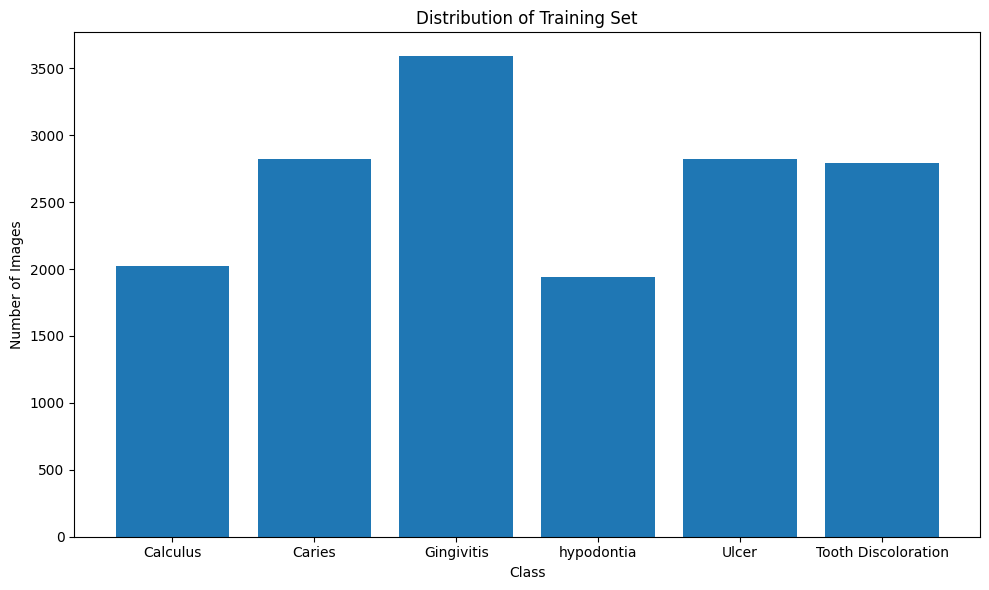

In [14]:
train_counts = list(train_sizes.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, train_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Training Set')
plt.tight_layout()
plt.show()

## Data Normalization Process

In [15]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

dataset = ImageFolder(root='Train', transform=transform)
loader = DataLoader(dataset, batch_size=64, shuffle=False, num_workers=4)

mean = 0.
std = 0.
nb_samples = 0.
for data, _ in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

print(f'Mean: {mean}')
print(f'Std: {std}')

Mean: tensor([0.6836, 0.4554, 0.4185])
Std: tensor([0.2020, 0.2232, 0.2078])


# Primary Model

In [34]:
import torch          
import torchvision   
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import time

# Define the CNN Architecture
class OralCNN(nn.Module):
    def __init__(self):
        super(OralCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  #smaller kernel on first conv layer
        self.conv2 = nn.Conv2d(32, 64, 7, padding=1) #bigger kernel on second layer
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 30 * 30, 512)  
        self.fc2 = nn.Linear(512, 6)  # 6 classes
        self.dropout = nn.Dropout(0.25) #dropout for regularization
        self.name = "OralClassifier"

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 30 * 30)  
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

mean = [0.6828, 0.4591, 0.4221]
std = [0.2034, 0.2248, 0.2094]

# Define the transform including resizing and normalization
common_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Load training and validation datasets with these transforms
train_dataset = ImageFolder(root='Train', transform=common_transforms)
val_dataset = ImageFolder(root='Val', transform=common_transforms)


model = OralCNN()

## Training 

In [35]:

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path



def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [41]:

def train_model(model, batch_size=64, learning_rate=0.01, num_epochs=3):
    torch.manual_seed(1000)

    # Use GPU if available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)



    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum= 0.9, weight_decay= 1e-8)

    #implementing weight decay with L2 regularization
    #optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)


    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers = 3)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers= 3)

    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    start_time = time.time()  # Start the timer

    for epoch in range(num_epochs):  # Loop over the dataset multiple times

        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0

        # Training
        model.train()
        for i, (inputs, labels) in enumerate(train_loader):  # Iterate over the batches
            # Transfer data to the device
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train_err += (predicted != labels).sum().item()
            total_epoch += labels.size(0)

        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i + 1)

        # Validation
        total_val_loss = 0.0
        total_val_err = 0.0
        total_epoch = 0

        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val_err += (predicted != labels).sum().item()
                total_epoch += labels.size(0)

        val_err[epoch] = float(total_val_err) / total_epoch
        val_loss[epoch] = float(total_val_loss) / len(val_loader)

        print(f'Epoch {epoch + 1}/{num_epochs}, Train err: {train_err[epoch]:.4f}, Train acc: {100 - (train_err[epoch] * 100)}%, Train loss: {train_loss[epoch]:.4f}, Validation err: {val_err[epoch]:.4f}, Validation acc: {100 - (val_err[epoch] * 100)}%, Validation loss: {val_loss[epoch]:.4f}')

        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f'Total time elapsed: {elapsed_time:.2f} seconds')

    # Save metrics
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt(f"{model_path}_train_err.csv", train_err)
    np.savetxt(f"{model_path}_train_loss.csv", train_loss)
    np.savetxt(f"{model_path}_val_err.csv", val_err)  
    np.savetxt(f"{model_path}_val_loss.csv", val_loss)

In [86]:
train_model(model, batch_size=128, learning_rate=0.001, num_epochs=20)

Epoch 1/20, Train err: 0.6203, Train acc: 37.96654599925103%, Train loss: 1.5490, Validation err: 0.4508, Validation acc: 54.91949910554562%, Validation loss: 1.2040
Epoch 2/20, Train err: 0.4870, Train acc: 51.30445637248783%, Train loss: 1.2711, Validation err: 0.4240, Validation acc: 57.60286225402504%, Validation loss: 1.0580
Epoch 3/20, Train err: 0.4378, Train acc: 56.22269379603046%, Train loss: 1.1295, Validation err: 0.3900, Validation acc: 61.001788908765654%, Validation loss: 0.9825
Epoch 4/20, Train err: 0.3800, Train acc: 61.996005492447885%, Train loss: 1.0089, Validation err: 0.3453, Validation acc: 65.47406082289802%, Validation loss: 0.8817
Epoch 5/20, Train err: 0.3401, Train acc: 65.99051304456373%, Train loss: 0.9077, Validation err: 0.3292, Validation acc: 67.08407871198568%, Validation loss: 0.8630
Epoch 6/20, Train err: 0.3141, Train acc: 68.5931843714892%, Train loss: 0.8257, Validation err: 0.3184, Validation acc: 68.15742397137745%, Validation loss: 0.8053
Epo

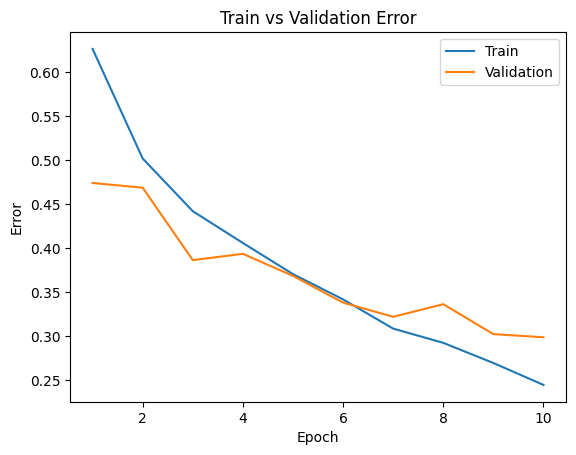

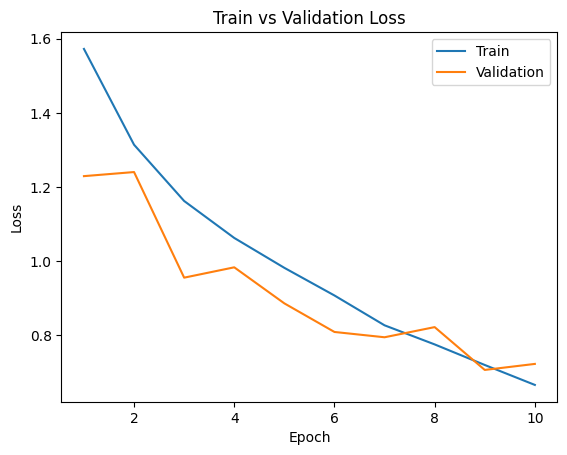

In [81]:
model_path = get_model_name("OralClassifier", batch_size= 128, learning_rate= 0.001, epoch=19)
plot_training_curve(model_path)

# AutoEncoder + Classifier Testing (Not Great)

In [29]:
'''
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=4, stride=2, padding=1), # 128x128x3 -> 64x64x32
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1), # 64x64x32 -> 32x32x64
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 32x32x64 -> 16x16x128
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 16x16x128 -> 8x8x256
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # 8x8x256 -> 16x16x128
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1), # 16x16x128 -> 32x32x64
            nn.ReLU(),
            nn.Dropout2d(0.2),  # Dropout layer for regularization
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1), # 32x32x64 -> 64x64x32
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=4, stride=2, padding=1), # 64x64x32 -> 128x128x3
            nn.Sigmoid()  # Output pixel values between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
    '''


In [30]:
'''
# Define the transform including resizing and normalization
common_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Load training and validation datasets with these transforms
train_dataset = ImageFolder(root='Train', transform=common_transforms)
val_dataset = ImageFolder(root='Val', transform=common_transforms)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

'''

In [27]:
'''

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(26*26*64, 512),  # Adjusted for the output of the autoencoder's encoder
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 6)  # 6 classes
        )

    def forward(self, x):
        x = x.view(-1, 26*26*64)  # Flatten the output of the encoder to fit the fully connected layer
        x = self.fc(x)
        return x
'''

In [ ]:
'''
# Function to train autoencoder
def train_autoencoder(autoencoder, train_loader, num_epochs=20):
    autoencoder.train()
    optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)
    criterion = nn.MSELoss()
    losses = []
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    for epoch in range(num_epochs):
        running_loss = 0.0
        for data in train_loader:
            imgs, _ = data
            imgs = imgs.to(device)  # Move data to device
            
            optimizer.zero_grad()
            outputs = autoencoder(imgs)
            loss = criterion(outputs, imgs)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * imgs.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Autoencoder Training Loss')
    plt.title("Training Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

autoencoder = Autoencoder().to(device)
train_autoencoder(autoencoder, train_loader)

'''

In [23]:
'''
def train_classifier(encoder, classifier, train_loader, val_loader, num_epochs=20):
    classifier.train()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    optimizer = optim.Adam(classifier.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()
    train_losses = []
    val_losses = []
    train_accuracy = []
    val_accuracy = []

    for epoch in range(num_epochs):
        # Training
        running_loss = 0.0
        correct = 0
        total = 0
        for data in train_loader:
            imgs, labels = data
            imgs, labels = imgs.to(device), labels.to(device)
            features = encoder(imgs).view(-1, 26*26*64)  # Adjusted for flattened output
            
            optimizer.zero_grad()
            outputs = classifier(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * imgs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_losses.append(running_loss / total)
        train_accuracy.append(correct / total)
        
        # Validation
        val_loss = 0.0
        correct = 0
        total = 0
        classifier.eval()
        with torch.no_grad():
            for data in val_loader:
                imgs, labels = data
                imgs, labels = imgs.to(device), labels.to(device)
                features = encoder(imgs).view(-1, 26*26*64)
                outputs = classifier(features)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * imgs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_losses.append(val_loss / total)
        val_accuracy.append(correct / total)
        
        print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracy[-1]*100:.2f}%, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracy[-1]*100:.2f}%')

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
classifier = Classifier().to(device)
# Make sure the encoder is in eval

'''

In [ ]:
'''

# Setting the device for GPU usage if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

encoder = autoencoder.encoder
encoder.eval()  # Set the encoder to evaluation mode


classifier = Classifier().to(device)


train_classifier(encoder, classifier, train_loader, val_loader, num_epochs=10)

'''

# Optimized CNN Architecture

In [32]:
class OralCNNEnhanced(nn.Module):
    def __init__(self):
        super(OralCNNEnhanced, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)  # Batch Normalization after Conv1
        self.conv2 = nn.Conv2d(32, 64, 7, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  # Batch Normalization after Conv2
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 30 * 30, 512)
        self.bn3 = nn.BatchNorm1d(512)  # Batch Normalization before the first fully connected layer
        self.fc2 = nn.Linear(512, 6)
        self.dropout = nn.Dropout(0.25)
        self.name = "OralClassifierEnhanced"

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 64 * 30 * 30)
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [42]:
optim_model = OralCNNEnhanced()

train_model(optim_model, batch_size=128, learning_rate= 0.001, num_epochs=15)

Epoch 1/15, Train err: 0.4096, Train acc: 59.03576788394197%, Train loss: 1.0756, Validation err: 0.3488, Validation acc: 65.11627906976744%, Validation loss: 0.8665
Epoch 2/15, Train err: 0.2569, Train acc: 74.30590295147573%, Train loss: 0.7231, Validation err: 0.2809, Validation acc: 71.91413237924866%, Validation loss: 0.7052
Epoch 3/15, Train err: 0.1940, Train acc: 80.60280140070034%, Train loss: 0.5642, Validation err: 0.2934, Validation acc: 70.6618962432916%, Validation loss: 0.7966
Epoch 4/15, Train err: 0.1556, Train acc: 84.435967983992%, Train loss: 0.4689, Validation err: 0.2576, Validation acc: 74.23971377459749%, Validation loss: 0.6563
Epoch 5/15, Train err: 0.1229, Train acc: 87.7063531765883%, Train loss: 0.3804, Validation err: 0.2683, Validation acc: 73.16636851520573%, Validation loss: 0.6201
Epoch 6/15, Train err: 0.0970, Train acc: 90.30140070035017%, Train loss: 0.3171, Validation err: 0.2809, Validation acc: 71.91413237924866%, Validation loss: 0.6922
Epoch 7/